# <b> Análise de Dados de Cliques em um Site utilizando Regressão Logística

## <b>Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # divisão em treino e teste
from sklearn.linear_model import LogisticRegression  # aplicar a regressão logística
from sklearn.metrics import classification_report    # visualizar os resultados
%matplotlib inline

## <b>Importando o Dataset

In [2]:
ad = pd.read_csv("advertising.csv")

Informações mais detalhadas sobre cada coluna:
* 'Daily Time Spent on Site': tempo no site em minutos.
* 'Age': idade do consumidor.
* 'Area Income': Média da renda do consumidor na região.
* 'Daily Internet Usage': Média em minutos por di que o consumidor está na internet.
* 'Linha do tópico do anúncio': Título do anúncio.
* 'City': Cidade do consumidor.
* 'Male': Se o consumidor era ou não masculino.
* 'Country': País do consumidor.
* 'Timestamp': hora em que o consumidor clicou no anúncio ou janela fechada.
* 'Clicked on Ad'': 0 ou 1 indicam se clicou ou não no anúncio.

## <b> Visualizando as informações do dataset

In [3]:
# Primeiras colunas
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
# Descrição estatística
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
# Informações gerais
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
# Colunas e Linhas
ad.shape

(1000, 10)

In [7]:
# Tipos dos dados
ad.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

## <b> Análise Exploratória dos Dados

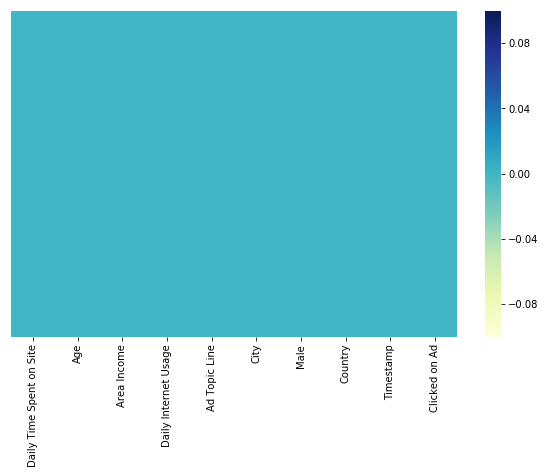

In [8]:
# Verificando através de um mapa de calor a existência de nulos
plt.figure(figsize = (10,6))
sns.heatmap(ad.isnull(),yticklabels=False,cbar=True,cmap='YlGnBu')

A cor totalmente sólida indica que todos os dados estão completos

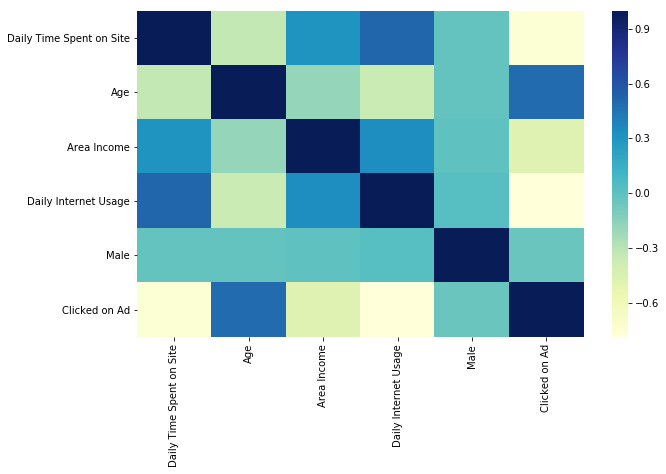

In [9]:
# Verificando o mapa de correlação entre as variáveis
plt.figure(figsize = (10,6))
sns.heatmap(ad.corr(),yticklabels=True,cbar=True,cmap='YlGnBu')

In [36]:
corr = ad.corr()
correlation = corr['Clicked on Ad'].sort_values(ascending=False)[:10]
correlation

Clicked on Ad               1.000000
Age                         0.492531
Male                       -0.038027
Area Income                -0.476255
Daily Time Spent on Site   -0.748117
Daily Internet Usage       -0.786539
Name: Clicked on Ad, dtype: float64

In [10]:
# Para facilitar
Age = ad['Age']
DIUsage = ad['Daily Internet Usage']
DTSSite = ad['Daily Time Spent on Site']
AreaIncome = ad['Area Income']
sns.set_style('whitegrid')

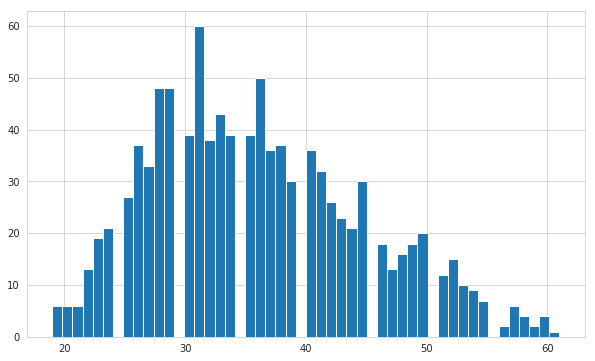

In [11]:
# Histograma das idades
plt.figure(figsize = (10,6))
Age.hist(bins=50)

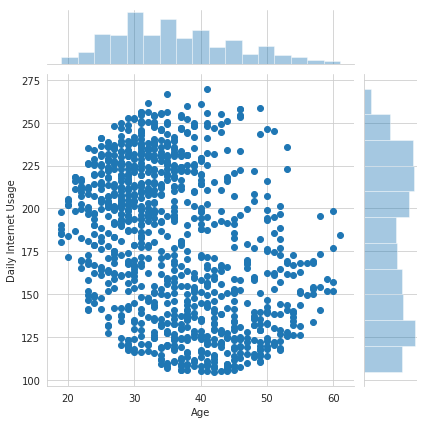

In [12]:
# Relação entre Daily Internet Usage X Age
sns.jointplot(x=Age,y=DIUsage,data=ad)

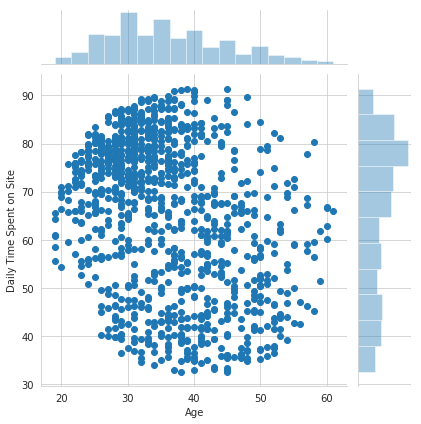

In [13]:
# Relação entre Daily Time Spent on Site X Age
sns.jointplot(x=Age,y=DTSSite,data=ad)

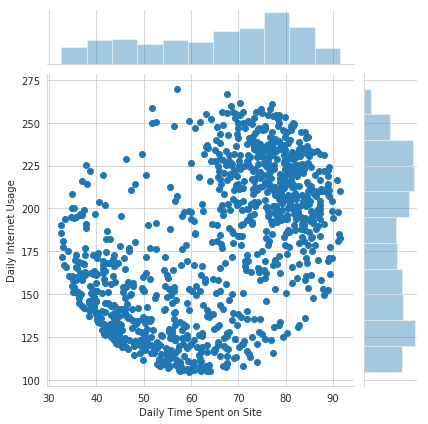

In [14]:
# Relação entre Daily Time Spent on Site X Daily Internet Usage
sns.jointplot(x=DTSSite,y=DIUsage,data=ad)

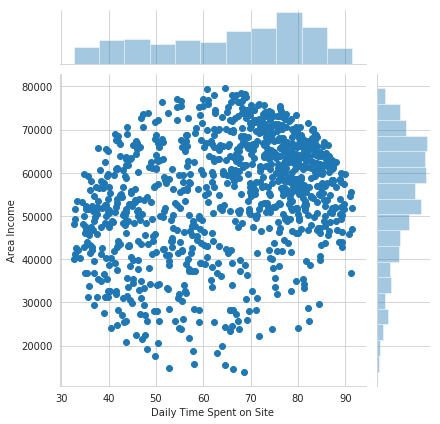

In [15]:
# Relação entre Daily Time Spent on Site X Area Income
sns.jointplot(x=DTSSite,y=AreaIncome,data=ad)

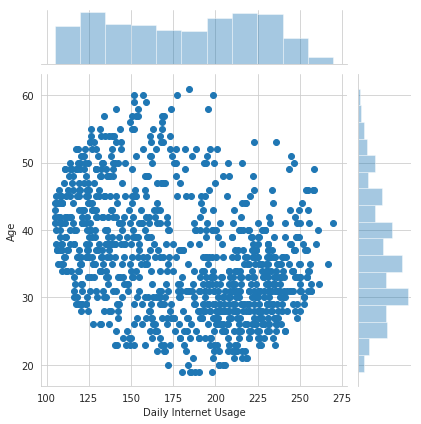

In [16]:
# Relação entre Daily Internet Usage X Area Income
sns.jointplot(x=DIUsage,y=Age,data=ad)

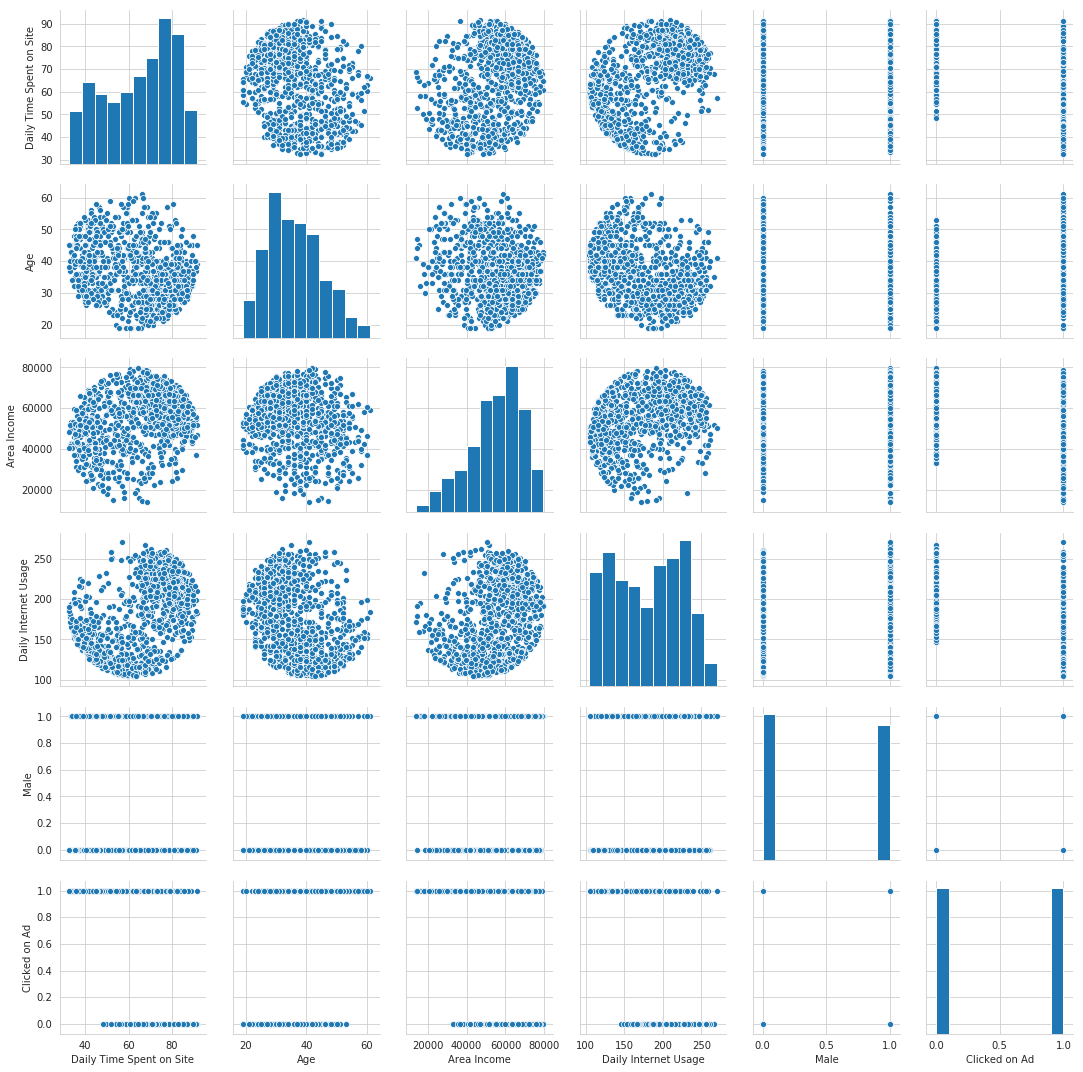

In [17]:
# Visualização de todas as variáveis
sns.pairplot(ad)

## <b> Aplicação do Algoritmo de Regressão Logística

In [18]:
# Conferindo os dados
ad.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0


In [24]:
# Variáveis X, que são as informações que temos
X = ad[['Daily Time Spent on Site', 'Daily Internet Usage', 'Age', 'Area Income']]
X.head(2)

,Daily Time Spent on Site,Daily Internet Usage,Age,Area Income
0,68.95,256.09,35,61833.90
1,80.23,193.77,31,68441.85


In [25]:
# Variável y, que queremos predizer

y = ad['Clicked on Ad']
y.head(2)

0    0
1    0
Name: Clicked on Ad, dtype: int64

#### <b> Dividindo o dataset em teste e treino

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [27]:
X_train.head()

,Daily Time Spent on Site,Daily Internet Usage,Age,Area Income
290,50.52,171.62,31,72270.88
167,86.06,219.72,31,53767.12
486,83.97,158.42,40,66291.67
683,76.83,192.81,28,67990.84
876,67.39,107.19,44,51257.26


In [28]:
X_test.head()

,Daily Time Spent on Site,Daily Internet Usage,Age,Area Income
545,42.60,168.29,55,55121.65
298,80.39,214.74,31,66269.49
109,74.02,210.54,32,72272.90
837,55.77,117.33,49,55942.04
194,77.20,254.05,33,49325.48


In [29]:
y_test.head()

545    1
298    0
109    0
837    1
194    0
Name: Clicked on Ad, dtype: int64

In [30]:
y_train.head()

290    1
167    0
486    0
683    0
876    1
Name: Clicked on Ad, dtype: int64

#### <b> Ajustando os dados ao modelo de Regressão Logística

In [31]:
# Definindo o modelo
logReg = LogisticRegression(solver='liblinear')

In [32]:
# Ajustando os dados de treino
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## <b> Análises 

In [28]:
# Previsão
predict = logReg.predict(X_test)

In [29]:
# Classificação do modelo
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



#### <b> Acurácia Média

In [30]:
print(logReg.score(X, y))

0.902


In [31]:
plt.clf()

<Figure size 432x288 with 0 Axes>